In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from matplotlib.font_manager import FontProperties
import numpy as np
import pandas as pd
%matplotlib inline

In [54]:
#define market structure
A = [[-3, -2],[-1, -3]]
B = [6,6]

def dynamics(x,t):
    c = 0.5
    x = np.atleast_2d(x).T
    x_dot = np.empty((3,1))
    #calc price dots
    beta = x[2]
    A = np.atleast_2d([[(beta-1.0)*6.0, (beta-1.0)*2.0],[-2.*(beta-1), -6]]);
    B = np.atleast_2d([[(1-beta)*6.0],[6.0]])
    temp = np.dot(A,x[0:2]).reshape(2,1)
    x_dot[0:2] = temp + B
    
    a_temp = np.atleast_2d([[-6, -2],[-2, 0]])
    b_temp = np.atleast_2d([[6],[0]])
    c_temp = np.dot(a_temp,x[0:2]).reshape(2,1) + b_temp
    pi1_dot = np.dot(x_dot[0:2].T, c_temp)
    
    a_temp = np.atleast_2d([[0, -1],[-1, -6]])
    b_temp = np.atleast_2d([[0],[6]])
    c_temp = np.dot(a_temp,x[0:2]).reshape(2,1) + b_temp
    pi2_dot = np.dot(x_dot[0:2].T, c_temp)
  
    pi_1 = x[0]*(-3*x[0] - 2*x[1] + 6)
    if pi_1 == 0:
        x_dot[2] = 10
    else:
        x_dot[2] = ((c-1)*pi2_dot + (c - beta)*pi1_dot)/pi_1
    
    #check limits
    if x_dot[0] < 0 and x[0] <= 0:
        x_dot[0] = 0
    if x_dot[1] < 0 and x[1] <= 0:
        x_dot[1] = 0
    if (x_dot[2] < 0 and beta <=0) or (x_dot[2] >0 and beta >= 1):
        x_dot[2] = 0
    return x_dot.flatten()

In [63]:
#non-cooperative equilibirum
#x_0 = np.array([12.0/17,15.0/17,0])
#super cooperative equilibrium
#x_0 = np.array([2.0/3,2.0/3,.5])
#other inputs
x_0 = np.array([1.,.3,.6])
t = np.linspace(0.0, 6.0, 1000)

x = odeint(dynamics, x_0, t)

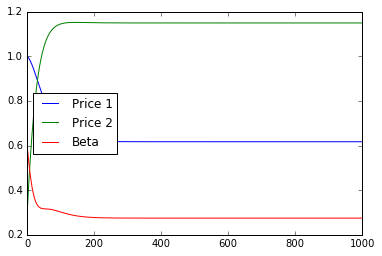

In [64]:
df = pd.DataFrame(x)
df.columns = ['Price 1', 'Price 2', 'Beta']
df.plot()
df['Profit 1'] = df['Price 1']*(A[0][0]*df['Price 1'] + A[0][1]*df['Price 2'] + B[0])
df['Profit 2'] = df['Price 2']*(A[1][0]*df['Price 1'] + A[1][1]*df['Price 2'] + B[1])
df['Util 1'] = df['Profit 1']*(1-df['Beta'])
df['Util 2'] = df['Profit 2'] + df['Beta']*df['Profit 1']
df['Social Welfare'] = df['Profit 1'] + df['Profit 2']

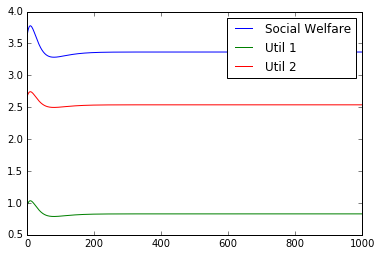

In [65]:
df[['Social Welfare', 'Util 1', 'Util 2']].plot()

In [23]:
print df[['Util 1', 'Util 2']]

       Util 1    Util 2
0    0.000000  0.000000
1    0.204875  0.208574
2    0.388398  0.402446
3    0.552443  0.582461
4    0.698735  0.749426
5    0.828858  0.904111
6    0.944270  1.047248
7    1.046307  1.179534
8    1.136198  1.301634
9    1.215070  1.414177
10   1.283955  1.517761
11   1.343800  1.612955
12   1.395472  1.700297
13   1.439766  1.780297
14   1.477405  1.853437
15   1.509055  1.920174
16   1.535321  1.980938
17   1.556757  2.036137
18   1.573867  2.086156
19   1.587111  2.131357
20   1.596909  2.172081
21   1.603642  2.208649
22   1.607657  2.241365
23   1.609267  2.270513
24   1.608760  2.296359
25   1.606394  2.319155
26   1.602404  2.339137
27   1.597001  2.356523
28   1.590378  2.371522
29   1.582708  2.384327
..        ...       ...
970  1.080000  2.160001
971  1.080000  2.160001
972  1.080000  2.160001
973  1.080000  2.160001
974  1.080000  2.160001
975  1.080000  2.160001
976  1.080000  2.160001
977  1.080000  2.160001
978  1.080000  2.160001
979  1.080000  2